In [1]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
</style>

## 4.12 自定义坐标轴刻度

虽然 Matplotlib 默认的坐标轴定位器（locator）与格式生成器
（formatter）可以满足大部分需求，但是并非对每一幅图都合适。本节
将通过一些示例演示如何将坐标轴刻度调整为你需要的位置与格式。
在介绍示例之前，我们最好先对 Matplotlib 图形的对象层级有更深入的
理解。Matplotlib 的目标是用 Python 对象表现任意图形元素。例如，想
想前面介绍的 figure 对象，它其实就是一个盛放图形元素的包围盒
（bounding box）。可以将每个 Matplotlib 对象都看成是子对象（subobject）的容器，例如每个 figure 都会包含一个或多个 axes 对象，每
个 axes 对象又会包含其他表示图形内容的对象。
坐标轴刻度线也不例外。每个 axes 都有 xaxis 和 yaxis 属性，每个属
性同样包含构成坐标轴的线条、刻度和标签的全部属性。

### 4.12.1 主要刻度与次要刻度

每一个坐标轴都有主要刻度线与次要刻度线。顾名思义，主要刻度往往
更大或更显著，而次要刻度往往更小。虽然一般情况下 Matplotlib 不会
使用次要刻度，但是你会在对数图中看到它们（如图 4-73 所示）：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.axes?

Signature: plt.axes(arg: 'None | tuple[float, float, float, float]' = None, **kwargs) -> 'matplotlib.axes.Axes'
Docstring:
Add an Axes to the current figure and make it the current Axes.

Call signatures::

    plt.axes()
    plt.axes(rect, projection=None, polar=False, **kwargs)
    plt.axes(ax)

Parameters
----------
arg : None or 4-tuple
    The exact behavior of this function depends on the type:

    - *None*: A new full window Axes is added using
      ``subplot(**kwargs)``.
    - 4-tuple of floats *rect* = ``(left, bottom, width, height)``.
      A new Axes is added with dimensions *rect* in normalized
      (0, 1) units using `~.Figure.add_axes` on the current figure.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
    The projection type of the `~.axes.Axes`. *str* is the name of
    a custom projection, see `~matplotlib.projections`. The default
    None results in a 'rectilinear' projection.

polar : bool, default: Fals

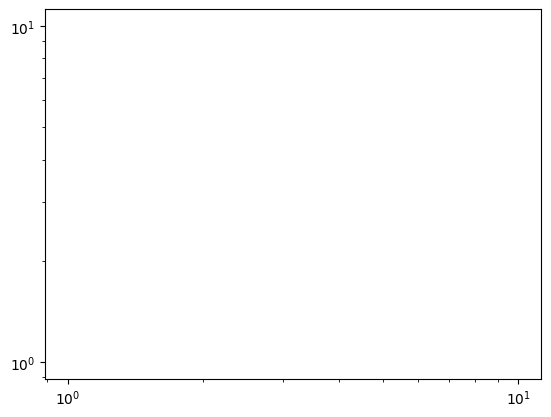

In [4]:
ax = plt.axes(xscale='log',yscale='log')

<p class='atcenter'>图 4-73：对数刻度与标签</p>

我们发现每个主要刻度都显示为一个较大的刻度线和标签，而次要刻度
都显示为一个较小的刻度线，且不显示标签。  
可以通过设置每个坐标轴的 formatter 与 locator 对象，自定义这些
刻度属性（包括刻度线的位置和标签）。来检查一下图形 x 轴的属性：


In [40]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [6]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())


我们会发现，主要刻度标签和次要刻度标签的位置都是通过一个
LogLocator 对象（在对数图中可以看到）设置的。然而，次要刻度有
一个 NullFormatter 对象处理标签，这样标签就不会在图上显示了。  
下面来演示一些示例，看看不同图形的定位器与格式生成器是如何设置
的。

### 4.12.2 隐藏刻度与标签

最常用的刻度 / 标签格式化操作可能就是隐藏刻度与标签了，可以通过
plt.NullLocator() 与 plt.NullFormatter() 实现，如下所示（如
图 4-74 所示）：

最常用的刻度 / 标签格式化操作可能就是隐藏刻度与标签了，可以通过
plt.NullLocator() 与 plt.NullFormatter() 实现，如下所示（如
图 4-74 所示）：

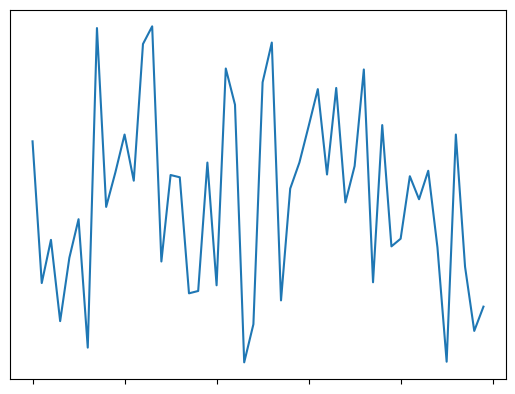

In [7]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

<p class='atcenter'>图 4-74：隐藏图形的 x 轴标签与 y 轴刻度</p>

需要注意的是，我们移除了 x 轴的标签（但是保留了刻度线 / 网格
线），以及 y 轴的刻度（标签也一并被移除）。在许多场景中都不需要
刻度线，比如当你想要显示一组图形时。举个例子，像图 4-75 那样包
含不同人脸的照片，就是经常用于研究有监督机器学习问题的示例（详
情请参见 5.7 节）：

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\郝海程\scikit_learn_data


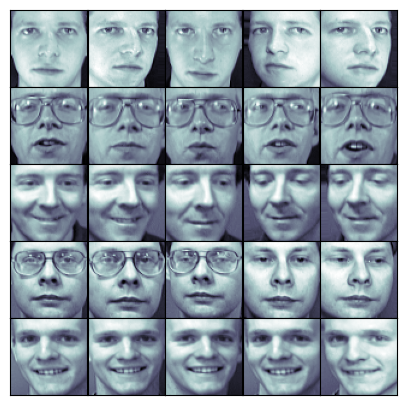

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# 从scikit-learn获取一些人脸照片数据
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

<p class='atcenter'>图 4-75：隐藏人脸图形的坐标轴</p

需要注意的是，由于每幅人脸图形默认都有各自的坐标轴，然而在这个
特殊的可视化场景中，刻度值（本例中是像素值）的存在并不能传达任
何有用的信息，因此需要将定位器设置为空。

### 4.12.3 增减刻度数量

默认刻度标签有一个问题，就是显示较小图形时，通常刻度显得十分拥
挤。我们可以在图 4-76 的网格中看到类似的问题：

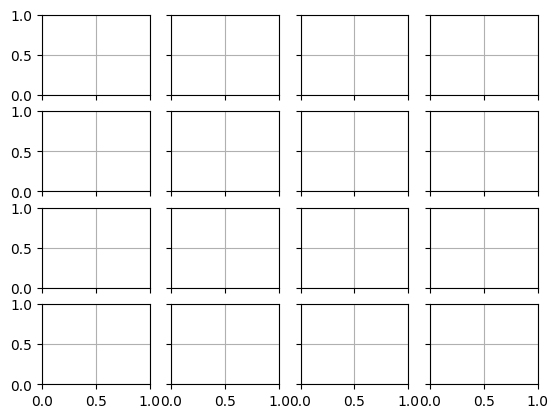

In [18]:
fig,ax = plt.subplots(4,4,sharex=True,sharey=True)
for i in range(0,4):
    for j in range(0,4):
        ax[i][j].grid(True)

<p class='atcenter'>图 4-76：刻度拥挤的图形</p>

尤其是 x 轴，数字几乎都重叠在一起，辨识起来非常困难。我们可以用
plt.MaxNLocator() 来解决这个问题，通过它可以设置最多需要显示
多少刻度。根据设置的最多刻度数量，Matplotlib 会自动为刻度安排恰
当的位置（如图 4-77 所示）：


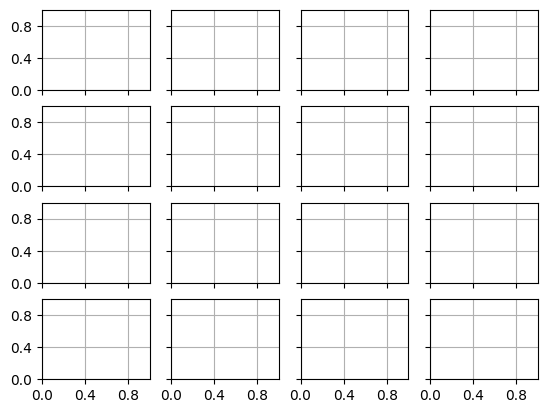

In [19]:
# 为每个坐标轴设置主要刻度定位器
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig


<p class='atcenter'>图 4-77：自定义刻度数量</p>

这样图形就显得更简洁了。如果你还想要获得更多的配置功能，那么可
以试试 plt.MultipleLocator，我们将在接下来的内容中介绍它。


### 4.12.4 花哨的刻度格式

Matplotlib 默认的刻度格式可以满足大部分的需求。虽然默认配置已经
很不错了，但是有时候你可能需要更多的功能，例如图 4-78 中的正弦
曲线和余弦曲线：

注意,PythonDatasinceHandbook这本书中有些细节是没有写到的,如下面代码中的lw  
表示的就是linewidth,但是前面的内容中是没有写到的

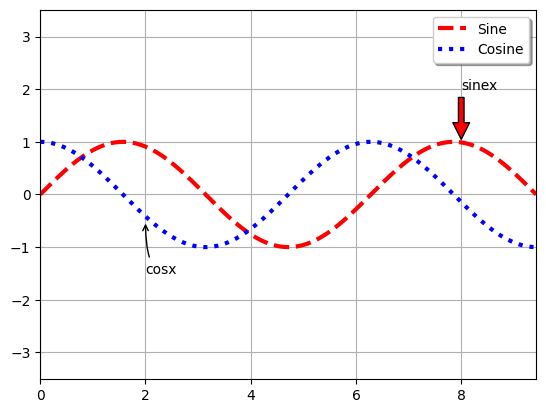

In [36]:
# 画正弦曲线和余弦曲线
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine',color='r',linestyle='--')
ax.plot(x, np.cos(x), lw=3, label='Cosine',color='b',linestyle=':')
# 往图上加箭头算是对上段错误出现后实操的补足
ax.annotate('sinex',xy=(8,1),xytext=(8,2),arrowprops=dict(facecolor='r',shrink=0.05))
ax.annotate('cosx',xy=(2,-0.5),xytext=(2,-1.5),arrowprops=dict(facecolor='blue',arrowstyle='->',connectionstyle="angle3,angleA=0,angleB=-90"))
# 设置网格、图例和坐标轴上下限
ax.grid(True)
ax.legend(shadow=1,fancybox=True)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

<p class='atcenter'>图 4-78：默认带整数刻度的图</p>

我们可能想稍稍改变一下这幅图。首先，如果将刻度与网格线画在 π 的
倍数上，图形会更加自然。可以通过设置一个 MultipleLocator 来实
现，它可以将刻度放在你提供的数值的倍数上。为了更好地测量，在
π/4 的倍数上添加主要刻度和次要刻度（如图 4-79 所示）：

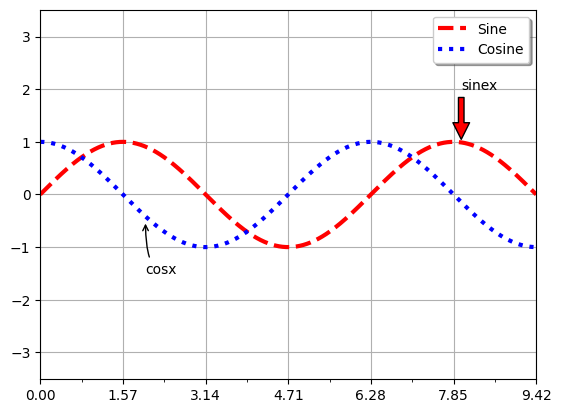

In [37]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

<p class='atcenter'>图 4-79：在π / 2 的倍数上显示刻度</p>

然而，这些刻度标签看起来有点奇怪：虽然我们知道它们是 π 的倍数，
但是用小数表示圆周率不太直观。因此，我们可以用刻度格式生成器来
修改。由于没有内置的格式生成器可以直接解决问题，因此需要用
plt.FuncFormatter 来实现，用一个自定义的函数设置不同刻度标签
的显示（如图 4-80 所示）：

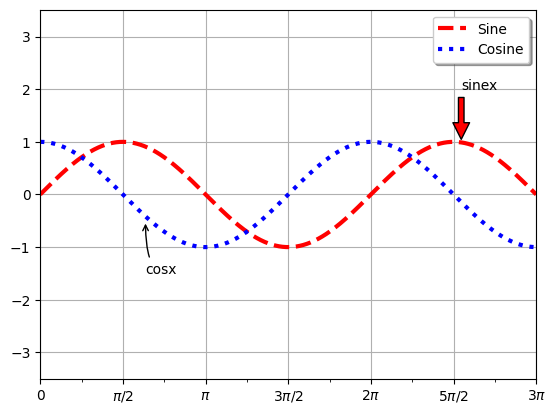

In [38]:
def format_func(value, tick_number):
    # 找到π/2的倍数刻度
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

<p class='atcenter'>图 4-80：自定义刻度标签</p>

### 4.12.5 格式生成器与定位器小结

<table>
    <tr>
        <th>定位器类</th>
        <th>描述</th>
    </tr>
    <tr>
        <td>NullLocator</td>
        <td>无刻度</td>
    </tr>
    <tr>
        <td>FixedLocator</td>
        <td>刻度位置固定</td>
    </tr>
    <tr>
        <td>IndexLocator</td>
        <td>用索引作为定位器（如 x = range(len(y)) ）</td>
    </tr>
    <tr>
        <td>LinearLocator</td>
        <td>从 min 到 max 均匀分布刻度</td>
    </tr>
    <tr>
        <td>LogLocator</td>
        <td>从 min 到 max 按对数分布刻度</td>
    </tr>
    <tr>
        <td>MultipleLocator</td>
        <td>刻度和范围都是基数（base）的倍数</td>
    </tr>
    <tr>
        <td>MaxNLocator</td>
        <td>为最大刻度找到最优位置</td>
    </tr>
    <tr>
        <td>AutoLocator</td>
        <td>（默认）以 MaxNLocator 进行简单配置</td>
    </tr>
    <tr>
        <td>AutoMinorLocator</td>
        <td>次要刻度的定位器</td>
    </tr>
</table>
<table>
    <tr>
        <th>格式生成类</th>
        <th>描述</th>
    </tr>
    <tr>
        <td>NullFormatter</td>
        <td>刻度上无标签</td>
    </tr>
    <tr>
        <td>IndexFormatter</td>
        <td>将一组标签设置为字符串</td>
    </tr>
    <tr>
        <td>FixedFormatter</td>
        <td>手动为刻度设置标签</td>
    </tr>
    <tr>
        <td>FuncFormatter</td>
        <td>用自定义函数设置标签</td>
    </tr>
    <tr>
        <td>FormatStrFormatter</td>
        <td>为每个刻度值设置字符串格式</td>
    </tr>
    <tr>
        <td>ScalarFormatter</td>
        <td>（默认）为标量值设置标签</td>
    </tr>
    <tr>
        <td>LogFormatter</td>
        <td>对数坐标轴的默认格式生成器</td>
    </tr>
</table>

我们将在后面的章节中看到使用这些功能的更多示例。